In [8]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import aesara_theano_fallback.tensor as tt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
def plot_cont(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    ax.plot(x, np.exp(self.logp(x)).eval())
    return ax

# Assign this distribution to the abstract class Continuous
pm.Continuous.plot = plot_cont

(0.0, 20.0)

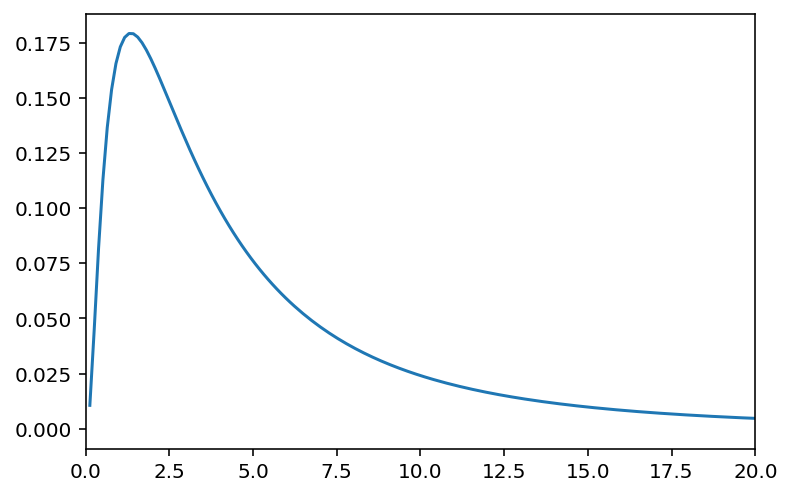

In [22]:
ax = pm.LogNormal.dist(mu=1.30, sd=1).plot()
ax.set_xlim(0,20)